# PCA and UMAP Visualization

In [1]:
import sys
from pathlib import Path

import pandas as pd
from sklearn.preprocessing import LabelBinarizer as labi

sys.path.append(f"../utils")
import analysis_utils as au
import preprocess_utils as ppu

/home/camo/anaconda3/envs/nf1_analysis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Preprocess data using preprocess utils

In [2]:
plates = {}

plates["1"] = {
    "path": "../nf1_painting_repo/3.processing_features/data/feature_selected_data/Plate_1_sc_norm_fs.parquet"
}
plates["2"] = {
    "path": "../nf1_painting_repo/3.processing_features/data/feature_selected_data/Plate_2_sc_norm_fs.parquet"
}

In [3]:
for plate, vals in plates.items():
    # Initializes the preprocessing class
    po = ppu.Preprocess_data(path=vals["path"])

    # Gets the dataframe after removing metadata columns,
    # except for the 'Metadata_genotype' column specified above
    platedf = po.remove_meta(po.df, kept_meta_columns=["Metadata_genotype"])

    platedf["labels"] = platedf["Metadata_genotype"] + plate
    platedf.drop(["Metadata_genotype"], axis=1, inplace=True)

    plates[plate]["df"] = platedf

# Combining Data

In [4]:
plate1df = plates["1"]["df"]
plate2df = plates["2"]["df"]

In [5]:
### Use only the common columns between both plates:
common_columns = list(plate1df.columns.intersection(plate2df.columns))
plate1df = plate1df.loc[:, common_columns]
plate2df = plate2df.loc[:, common_columns]

In [6]:
platescomb = pd.concat([plate1df, plate2df], axis=0)

plateswt = platescomb.loc[~platescomb["labels"].str.contains("Null")]
platesnull = platescomb.loc[~platescomb["labels"].str.contains("WT")]

In [7]:
platescomb

,Cytoplasm_AreaShape_Compactness,Cytoplasm_AreaShape_Extent,Cytoplasm_AreaShape_FormFactor,Cytoplasm_AreaShape_MajorAxisLength,Cytoplasm_AreaShape_MinorAxisLength,Cytoplasm_AreaShape_Orientation,Cytoplasm_AreaShape_Zernike_0_0,Cytoplasm_AreaShape_Zernike_1_1,Cytoplasm_AreaShape_Zernike_2_0,Cytoplasm_AreaShape_Zernike_2_2,...,Nuclei_Texture_Correlation_RFP_3_01_256,Nuclei_Texture_Correlation_RFP_3_02_256,Nuclei_Texture_Correlation_RFP_3_03_256,Nuclei_Texture_DifferenceEntropy_DAPI_3_02_256,Nuclei_Texture_Entropy_GFP_3_01_256,Nuclei_Texture_InfoMeas1_RFP_3_00_256,Nuclei_Texture_InfoMeas1_RFP_3_01_256,Nuclei_Texture_InfoMeas1_RFP_3_02_256,Nuclei_Texture_InfoMeas1_RFP_3_03_256,labels
0,-0.866469,0.365761,1.085469,0.770961,0.666284,-0.749900,0.661732,1.323116,0.807823,0.200223,...,-0.992900,0.391137,1.248561,0.109633,0.765902,1.235152,1.097157,0.483060,-0.716870,WT1
1,-0.487515,-0.048849,0.159441,-0.621640,0.748608,0.447298,0.200611,1.209133,0.479844,-0.380244,...,0.140534,1.130888,-0.034235,0.150544,0.736221,1.168106,0.597413,-0.394244,0.643091,WT1
2,-0.702648,0.284785,0.609404,1.617286,0.840024,-0.622242,-0.305528,-0.199301,0.931809,-0.139245,...,-0.583438,0.572542,1.401929,0.332890,0.575919,1.160536,1.023517,0.523072,-0.391189,WT1
3,-0.716243,-0.311691,0.643628,-0.474280,0.698256,0.264805,0.371959,-0.213520,1.000505,-0.586393,...,0.740171,1.680835,0.430406,0.243086,0.298727,0.879486,0.154994,-1.144113,0.367413,WT1
4,-0.354619,0.181546,-0.053374,0.593151,1.540645,0.048540,-0.092116,-0.009617,1.103277,-0.981680,...,0.210179,0.951101,-1.174760,-0.269106,0.527038,1.516893,0.512479,0.039207,1.074682,WT1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-0.753025,0.523286,0.798261,-0.872089,-0.492291,1.618686,0.359809,-1.102896,1.161696,-0.257538,...,0.307429,0.748838,0.824991,0.740049,0.336913,-0.837802,-1.184404,-0.979037,-1.232766,Null2
1793,-0.956224,1.196005,1.598254,0.214021,0.130621,-1.318079,0.786723,-0.811139,1.369980,1.272042,...,0.687320,1.118391,0.998688,0.153110,0.089498,-1.265487,-0.946266,-0.647258,-1.412729,Null2
1794,-0.922988,1.109164,1.438923,-0.079413,1.041486,1.369584,1.171209,0.284709,0.643738,0.015207,...,0.617659,-0.195603,-0.016901,0.077928,0.449100,-0.480685,0.114061,0.555209,0.382678,Null2
1795,-0.768565,0.457542,0.847167,0.174587,1.074115,-0.827953,0.729937,0.679197,1.015021,-0.361618,...,-1.082674,-0.247359,1.745285,0.613759,-0.843526,0.291507,0.896255,0.619834,-1.408127,Null2


In [8]:
plateswt = platescomb[~platescomb.iloc[:, -1].str.contains("Null")]
platesnull = platescomb[~platescomb.iloc[:, -1].str.contains("WT")]

# Visualization

In [9]:
out_path = Path("figures")

if not out_path.exists():
    out_path.mkdir(parents=True, exist_ok=True)

Explained variance in PC1 and PC2 = 0.2110414424594691


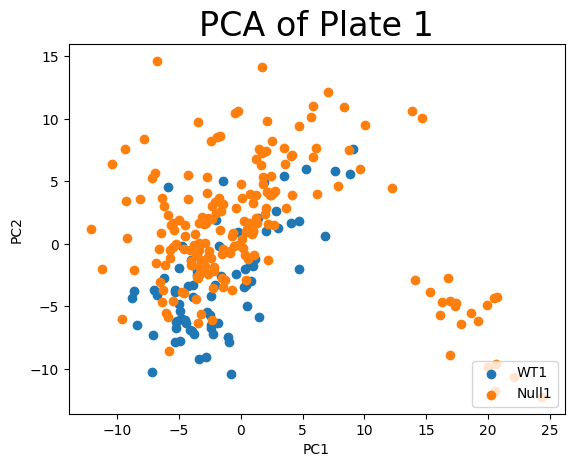

In [10]:
save_args = {"fname": out_path / "pca_plate1"}
au.plot_pca(
    feats=plate1df.drop("labels", axis=1),
    labels=plate1df["labels"],
    save_args=save_args,
    title="PCA of Plate 1",
)

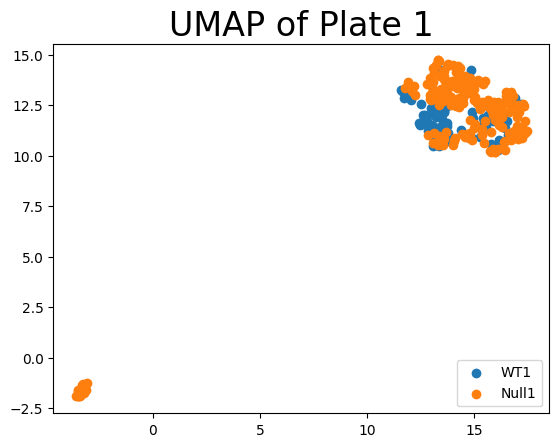

In [11]:
save_args = {"fname": out_path / "umap_plate1"}
au.plot_umap(
    feats=plate1df.drop("labels", axis=1),
    labels=plate1df["labels"],
    save_args=save_args,
    title="UMAP of Plate 1",
)

Explained variance in PC1 and PC2 = 0.22328816949966995


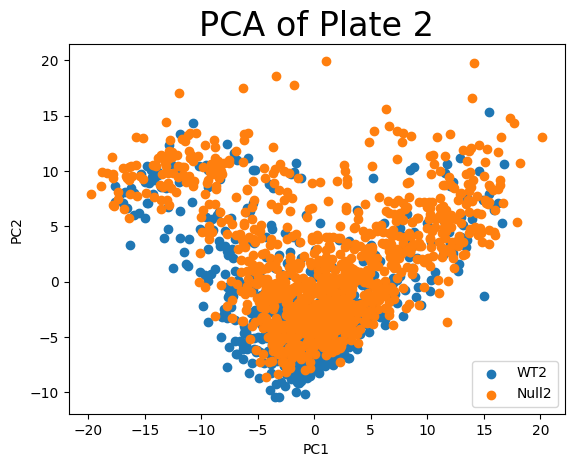

In [12]:
save_args = {"fname": out_path / "pca_plate2"}
au.plot_pca(
    feats=plate2df.drop("labels", axis=1),
    labels=plate2df["labels"],
    save_args=save_args,
    title="PCA of Plate 2",
)

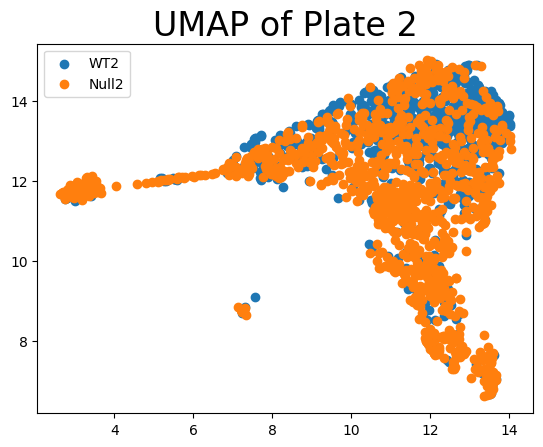

In [13]:
save_args = {"fname": out_path / "umap_plate2"}
au.plot_umap(
    feats=plate2df.drop("labels", axis=1),
    labels=plate2df["labels"],
    save_args=save_args,
    loc="upper left",
    title="UMAP of Plate 2",
)

Explained variance in PC1 and PC2 = 0.2162738416226354


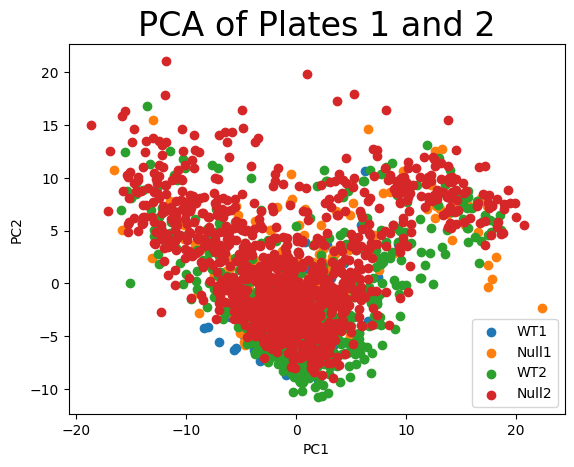

In [14]:
save_args = {"fname": out_path / "pca_plates_1_2"}
au.plot_pca(
    feats=platescomb.drop("labels", axis=1),
    labels=platescomb["labels"],
    save_args=save_args,
    title="PCA of Plates 1 and 2",
)

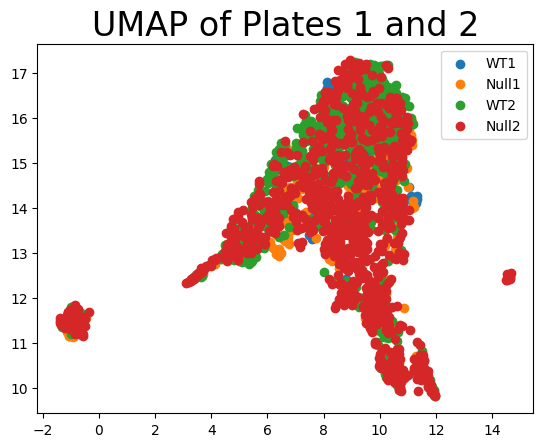

In [15]:
save_args = {"fname": out_path / "umap_plates_1_2"}
au.plot_umap(
    feats=platescomb.drop("labels", axis=1),
    labels=platescomb["labels"],
    save_args=save_args,
    loc="upper right",
    title="UMAP of Plates 1 and 2",
)

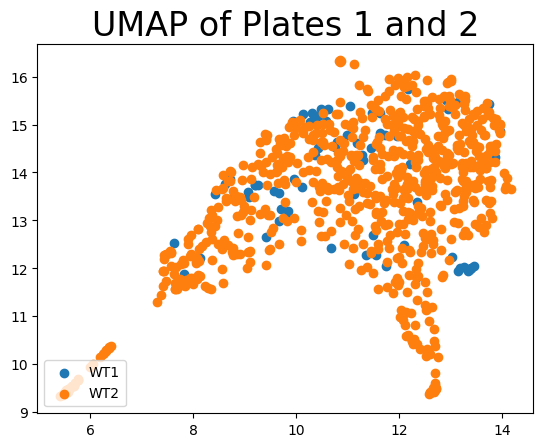

In [16]:
save_args = {"fname": out_path / "umap_wt_plates_1_2"}
au.plot_umap(
    feats=plateswt.drop("labels", axis=1),
    labels=plateswt["labels"],
    save_args=save_args,
    loc="lower left",
    title="UMAP of Plates 1 and 2",
)

Explained variance in PC1 and PC2 = 0.19870857582344342


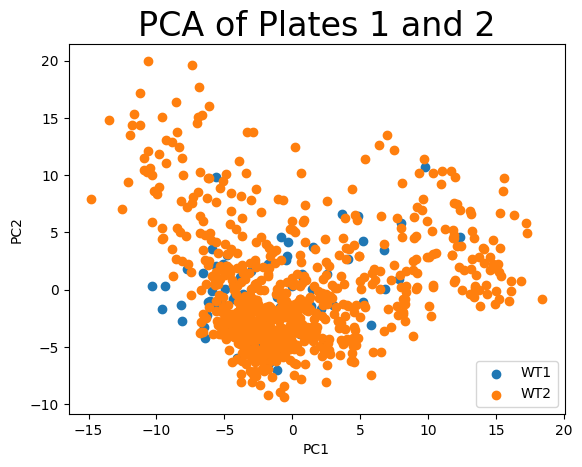

In [17]:
save_args = {"fname": out_path / "pca_wt_plates_1_2"}
au.plot_pca(
    feats=plateswt.drop("labels", axis=1),
    labels=plateswt["labels"],
    save_args=save_args,
    title="PCA of Plates 1 and 2",
)

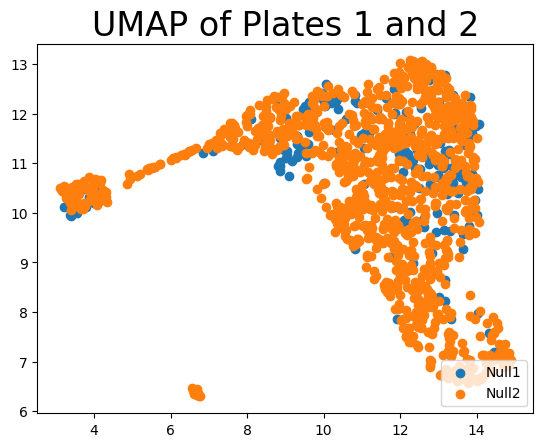

In [18]:
save_args = {"fname": out_path / "umap_null_plates_1_2"}
au.plot_umap(
    feats=platesnull.drop("labels", axis=1),
    labels=platesnull["labels"],
    save_args=save_args,
    title="UMAP of Plates 1 and 2",
)

Explained variance in PC1 and PC2 = 0.22538295338424205


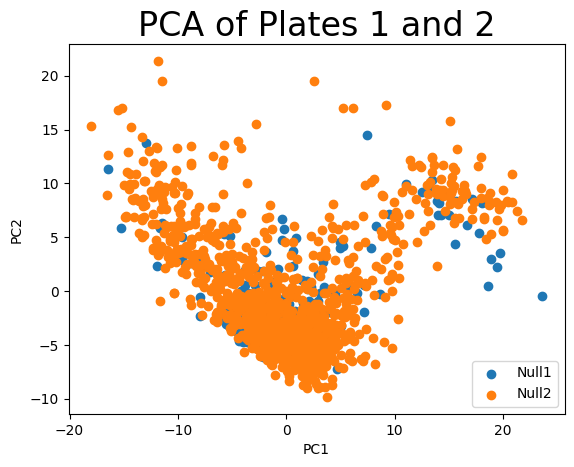

In [19]:
save_args = {"fname": out_path / "pca_null_plates_1_2"}
au.plot_pca(
    feats=platesnull.drop("labels", axis=1),
    labels=platesnull["labels"],
    save_args=save_args,
    title="PCA of Plates 1 and 2",
)